
#### Cenário do Problema

Você trabalha para um grande produtor de doces e seu objetivo é escrever um relatório que sua empresa possa usar para orientar o design de seu próximo produto. Logo depois de iniciar sua pesquisa, você se depara com um conjunto de dados muito interessante contendo resultados de uma pesquisa divertida realizada com uma pequena parcela da população sobre os doces favoritos. Para ter sucesso, você precisará importar dados para o python, responder a perguntas usando os dados e gerar **gráficos de dispersão** para entender os padrões nos dados.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Passo 01: Carregar os Dados

In [4]:
# Ler e carregar a base de dados
arquivo = 'candy.csv'
candy_df = pd.read_csv(arquivo, index_col = 'id')

# Examinar a base de dados
linhas, colunas = candy_df.shape # Extrair tamanho da base de dados
print('A base de dados possui {} linhas e {} colunas.'.format(linhas, colunas)) # Apresentar informação ao usuário

# Salvar o dataframe já formatado no computador 
candy_df.to_excel('Companhia de Doces Formatado.xlsx', index = False) # Salvar o dataframe em formato de arquivo Excel
# candy_df.to_csv('Companhia de Doces Formatado.csv', index = False) # Salvar o dataframe em formato de arquivo CSV

candy_df.head(10) # Visualizar as 10 primeiras linhas da base de dados

A base de dados possui 83 linhas e 13 colunas.


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547
5,Boston Baked Beans,No,No,No,Yes,No,No,No,No,Yes,0.313,0.511,23.417824
6,Candy Corn,No,No,No,No,No,No,No,No,Yes,0.906,0.325,38.010963
7,Caramel Apple Pops,No,Yes,Yes,No,No,No,No,No,No,0.604,0.325,34.517681
8,Charleston Chew,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,38.975037


O conjunto de dados contém 83 linhas, onde cada uma corresponde a uma barra de chocolate diferente. Existem 13 colunas:

- `'competitorname'` contém o nome da barra de chocolate.
- as próximas ** 9 ** colunas (de `'chocolate'` a`' pluribus'`) descrevem o doce. Por exemplo, linhas com bombons de chocolate têm `'Yes'` na coluna `'chocolate'` (e balas sem chocolate têm` 'No' `na mesma coluna).
- `'sugarpercent'` fornece alguma indicação da quantidade de açúcar, onde valores mais altos significam maior teor de açúcar.
- `'pricepercent'` mostra o preço por unidade, em relação aos outros doces no conjunto de dados.
- `'winpercent'` é calculado a partir dos resultados da pesquisa; valores mais altos indicam que o doce era mais popular entre os participantes da pesquisa. 

#### Passo 03: O Papel do Açúcar
#### Parte A

As pessoas tendem a preferir doces com maior teor de açúcar? 

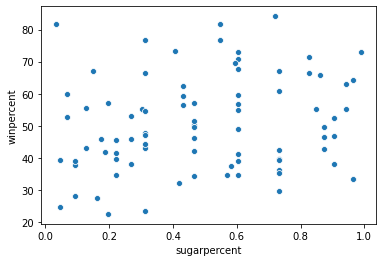

In [16]:
# Gráfico de dispersão mostrando a relação entre 'sugarpercent' e 'winpercent'
sns.scatterplot(x = candy_df['sugarpercent'], y = candy_df['winpercent'], palette = 'deep');

#### Parte B

O gráfico de dispersão mostra uma correlação **forte** entre as duas variáveis? Em caso afirmativo, os doces com mais açúcar são relativamente mais ou menos populares entre os entrevistados?

O gráfico de dispersão não mostra uma correlação **forte** entre as duas variáveis. Como não há uma relação clara entre as duas variáveis, isso nos diz que o teor de açúcar não desempenha um papel importante na popularidade dos doces.

#### Passo 04: Uma Olhada Mais de Perto

#### Parte A

Crie o mesmo gráfico de dispersão que você criou no **Passo 03**, mas agora com uma linha de regressão!

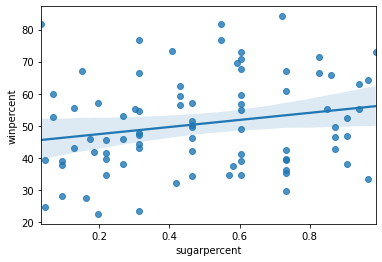

In [5]:
# Gráfico de dispersão com linha de regressão mostrando a relação entre 'sugarpercent' e 'winpercent'
sns.regplot(x = candy_df['sugarpercent'], y = candy_df['winpercent']);

#### Parte B

De acordo com o gráfico acima, existe uma **leve** correlação entre `'winpercent'` e`'sugarpercent'`? O que isso diz a você sobre os doces que as pessoas tendem a preferir?

Uma vez que a linha de regressão tem uma inclinação ligeiramente positiva, isso nos diz que há uma correlação ligeiramente positiva entre `'winpercent'` e`'sugarpercent'`. Portanto, as pessoas têm uma **leve** preferência por doces que contêm relativamente mais açúcar.

#### Passo 05: Chocolate!

Na célula de código abaixo, crie um gráfico de dispersão para mostrar a relação entre `'pricepercent'` (no eixo x-horizontal) e`'winpercent'` (no eixo y-vertical). Use a coluna `'chocolate'` para codificar os pontos por cor.

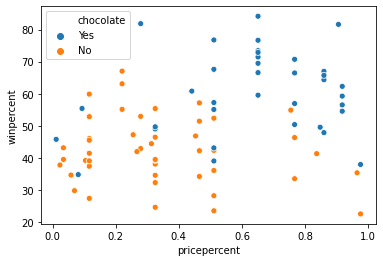

In [6]:
# Gráfico de dispersão mostrando a relação entre 'sugarpercent', 'winpercent' e 'chocolatee'
sns.scatterplot(x = candy_df['pricepercent'], y = candy_df['winpercent'], hue = candy_df['chocolate']);

Você consegue ver algum padrão interessante no gráfico de dispersão? Investigaremos esse gráfico ainda mais adicionando linhas de regressão na próxima etapa!

#### Passo 06: Investigando o Chocolate

#### Parte A

Crie o mesmo gráfico de dispersão criado na **Passo 05**, mas agora com duas linhas de regressão, correspondendo a (1) bombons de chocolate e (2) bombons sem chocolate.

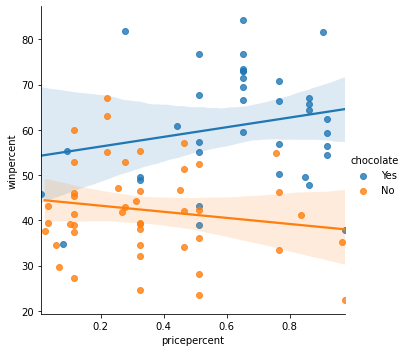

In [7]:
# Gráfico de dispersão codificado por cores com linhas de regressão
sns.lmplot(x = 'pricepercent', y = 'winpercent', hue = 'chocolate', data = candy_df);

#### Parte B

Usando as linhas de regressão, que conclusões você pode tirar sobre os efeitos do chocolate e do preço na popularidade dos doces?

Começaremos com a linha de regressão para bombons de chocolate. Como essa linha tem uma inclinação levemente positiva, podemos dizer que bombons de chocolate mais caros tendem a ser mais populares (do que bombons de chocolate relativamente mais baratos). Da mesma forma, como a linha de regressão para bombons sem chocolate tem inclinação negativa, podemos dizer que se bombons não contiverem chocolate, tendem a ser mais populares quando são mais baratos. Uma observação importante, no entanto, é que o conjunto de dados é muito pequeno - portanto, não devemos confiar muito nesses padrões! Para inspirar mais confiança nos resultados, **devemos adicionar mais doces ao conjunto de dados**.

#### Passo 07: Todo Mundo Ama Chocolate

#### Parte A

Crie um gráfico de dispersão categórico para destacar a relação entre `'chocolate'` e`' winpercent'`. Coloque `'chocolate'` no eixo x (horizontal) e`' winpercent'` no eixo y (vertical).

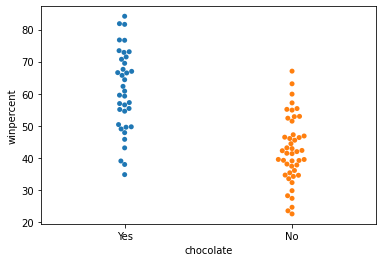

In [10]:
# Gráfico de dispersão mostrando a relação entre 'chocolate' e 'winpercent'
sns.swarmplot(x = candy_df['chocolate'], y = candy_df['winpercent']);

#### Parte B

Você decide dedicar uma seção de seu relatório ao fato de que balas de chocolate tendem a ser mais populares do que balas sem chocolate. Qual enredo é mais apropriado para contar esta história: o gráfico do **Passo 06** ou o gráfico do **Passo 07**?

Qual gráfico comunica mais informações? Em geral, é uma boa prática usar o gráfico mais simples que conte toda a história de interesse.

Nesse caso, o gráfico de dispersão categórico do **Passo 07** é o gráfico mais apropriado. Embora os dois gráficos contem a história desejada, o gráfico do **Passo 06** transmite muito mais informações que podem desviar a atenção do ponto principal.